In [1]:
dataset=[
    ['사과','치즈','생수'],
['생수','호두','치즈','고등어'],
['수박','사과','생수'],
['생수','호두','치즈','옥수수'] 
]

In [2]:
from mlxtend.preprocessing import TransactionEncoder
import pandas as pd

#트랜잭션 자료형으로 변환
#x축 전체품목, y축 거래아이디(영수증)
te = TransactionEncoder() #자동으로 변환해주는 코드
te_ary = te.fit(dataset).transform(dataset)
df = pd.DataFrame(te_ary, columns=te.columns_)
# 데이터프레임으로 변환

In [3]:
# 선험적 알고리즘 support > 0.5이상
from mlxtend.frequent_patterns import apriori

frequent_itemsets = apriori(df, min_support=0.5,
use_colnames=True)
frequent_itemsets

,support,itemsets
0,0.50,(사과)
1,1.00,(생수)
2,0.75,(치즈)
3,0.50,(호두)
4,0.50,"(생수, 사과)"
5,0.75,"(치즈, 생수)"
6,0.50,"(호두, 생수)"
7,0.50,"(치즈, 호두)"
8,0.50,"(치즈, 호두, 생수)"


In [4]:
#confidence > 0.3(기본값 0.8)
from mlxtend.frequent_patterns import association_rules #연관규칙함수
rules = association_rules(frequent_itemsets,
metric='confidence', min_threshold=0.3)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(생수),(사과),1.00,0.50,0.50,0.500000,1.000000,0.000,1.0
1,(사과),(생수),0.50,1.00,0.50,1.000000,1.000000,0.000,inf
2,(치즈),(생수),0.75,1.00,0.75,1.000000,1.000000,0.000,inf
3,(생수),(치즈),1.00,0.75,0.75,0.750000,1.000000,0.000,1.0
4,(호두),(생수),0.50,1.00,0.50,1.000000,1.000000,0.000,inf
5,(생수),(호두),1.00,0.50,0.50,0.500000,1.000000,0.000,1.0
6,(치즈),(호두),0.75,0.50,0.50,0.666667,1.333333,0.125,1.5
7,(호두),(치즈),0.50,0.75,0.50,1.000000,1.333333,0.125,inf
8,"(치즈, 호두)",(생수),0.50,1.00,0.50,1.000000,1.000000,0.000,inf
9,"(치즈, 생수)",(호두),0.75,0.50,0.50,0.666667,1.333333,0.125,1.5


NetworkXError: random_state_index is incorrect

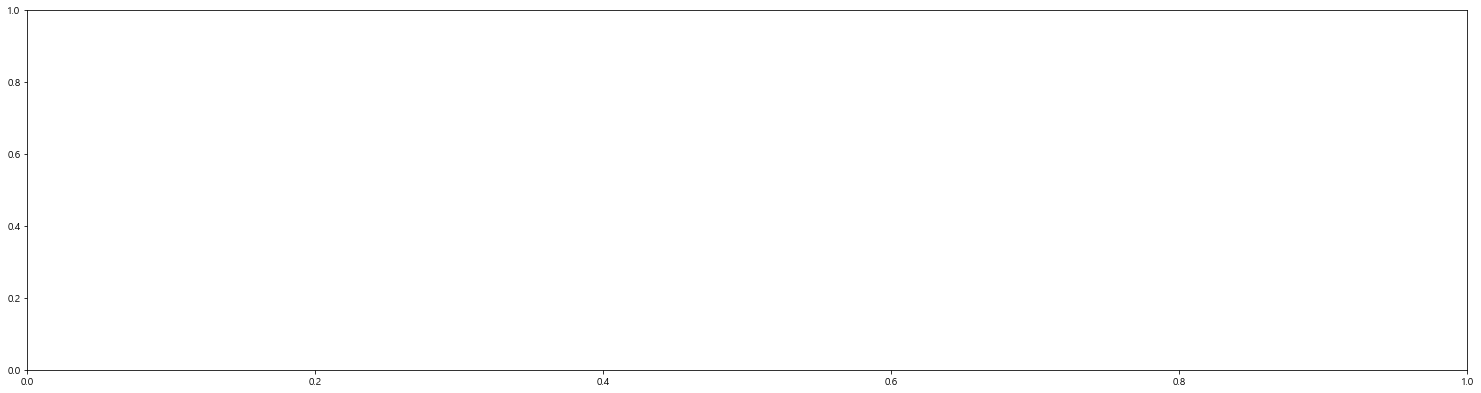

In [13]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
#한글 처리를 위해 폰트 설정
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)
import networkx as nx
# antecedents (~ ), consequents (~ ) 선행 라면 결과 이다
ga=nx.from_pandas_edgelist(rules,source='antecedents',target='consequents')
plt.figure(figsize=(20,5))
nx.draw(ga,with_labels=True,font_family=font_name,font_size=15)
# source( ), target( ) 